This jupyter-notebook presents the core facillities of BetheFluid package
with examples.

In [1]:
import BetheFluid as bth
import numpy as np
import matplotlib.pyplot as plt

To initiallize calculations one has to create the object of the class Solver. In the above example one takes default arguments of the momenta, position and time grid as well as the initiall state of the momentum density. 

In [2]:
calculation = bth.Solver()

To start calculations, one can use method solve_equation(path), where path argument defines name and  path to save Solver object as .pkl binary file. Argument path is by default None and does not save any files.

In [3]:
calculation.solve_equation(path='./files/first_calculation.pkl')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15.29it/s]


The array of the momenta density is grid attribute. The diemnsions are with the order of:
moment, position, time

In [4]:
calculation.grid.shape

(40, 25, 5)

Below shows how to create users initial state and grids 

In [5]:
# function that defines the initial state

def initial_state(l, x):
    rho = (2 + 0.25 * np.cos(2 * x * np.pi)) * (
            1 / (1 + np.exp(2 * (l + 2.4) ** 2 - 3)) + 1 / (1 + np.exp(2 * (l - 2.4) ** 2 - 3))) / (
                  2 * np.pi) * 0.25 / 2

    return rho


# creating position, momenta and time grids 

x_grid, int_x = np.linspace(-0.5, 0.5, 25, endpoint=False, retstep=True)
l_grid, int_l = np.linspace(-5, 5, 40, endpoint=False, retstep=True)
t_diff = np.arange(0, 0.005, 0.001)

# interaction constant for Lieb-Liniger model
c = 3

Passing arguments to Solver:

In [6]:
user_calculation = bth.Solver(t_grid=t_diff, miu_grid=l_grid, x_grid=x_grid, 
                          rho0=initial_state, coupling=c)

By the default the calculation is performed with diffusion correction. To turn it off one has to change default attribute of diff

In [7]:
no_diffusion = bth.Solver(diff=None)

In [8]:
no_diffusion.solve_equation()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15.46it/s]


Lastly one can calculate time evolution under the external potential, by passing the argument potential. By default calculations is done with diffusion and external potential. External potential is avalaible only with the diffusion term. With diff=None, calculation is performed as if there was no potential.

In [9]:
# defining external potential

def potential_def(x):
    potential = 1 / 5 * np.cos(2 * np.pi * x)

    return potential

# passing to Solver
external_potential = bth.Solver(potential=potential_def)

Once calculation is saved, by path argument in solve_equation() or by save(path) method, the pkl file can be loaded with method load(path)

In [10]:
loaded_calculation = bth.Solver.load('./files/implicit_calculation.pkl')

Benefits of saving the whole object rather than just an array of the momenta density is that we save additional informations about the calculation, which can be just printed

In [11]:
print(loaded_calculation)

Solver object:
coupling constant: 3
time grid: Length: 20000, average interval 0.001, final step 19.999
space grid: Length: 25, average interval -0.01999999999999999, final step 0.45999999999999996
diffusion: False


If calculation did not converge to homogenous state in position space, one can utilize method continue_calculations to check the further times by specifying how much ones wants to elongate calculation

In [12]:
# before elongation
user_calculation.t_grid

array([0.   , 0.001, 0.002, 0.003, 0.004])

In [13]:
# performing calculations for longer times
user_calculation.continue_calculations(elongation_factor=1.5)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.96it/s]


In [14]:
# after the elongation
user_calculation.t_grid

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

Once calculation is performed, one can analize the data with the class Observable(Solver)

In [15]:
obs = bth.Observable(loaded_calculation)

Equivalently one cas just pass the path to the .pkl file with Solver object

In [16]:
obs = bth.Observable('./files/implicit_calculation.pkl')

Observable can plot the energy, entropy and occupation function evolution with plot methods

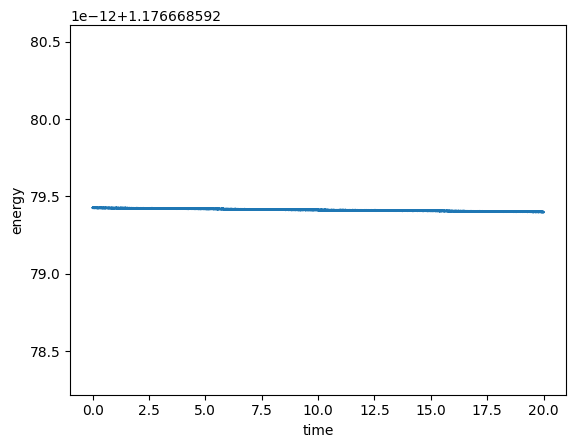

In [17]:
obs.plot_energy()

The plot_n method has argument frames, which specifies takes a list of time frames user want to plot

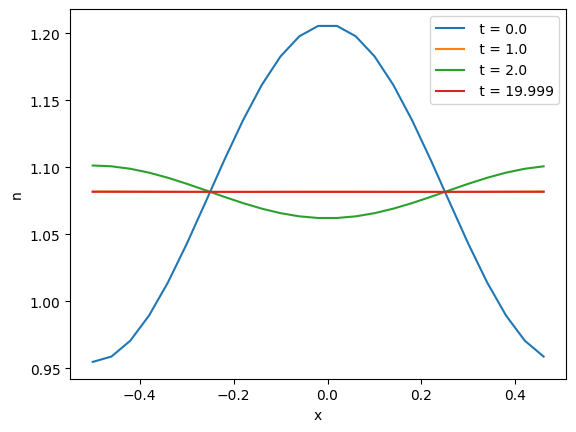

In [18]:
obs.plot_n(frames=[0, 1000, 2000, -1])

If one wants to make his own plots of observables, one can use calc_ functions. The dimensions of the returned observables is as in Solver object: momenta, position, time, but with one or two of variables integrated out

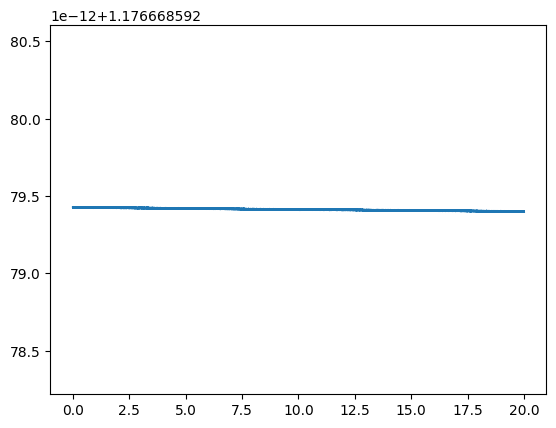

In [19]:
# calculating the energy
energy_array = obs.calc_energy()

plt.plot(obs.solver_object.t_grid, energy_array)

All calc and plots methods accept argument option which might one of the following strings:
'local', 'theta', 'total'. 'local' integrates the observable over momenta space, 'theta' integrates over position space, whereas 'total' integrates over both momenta and position space.

In [20]:
entropy = obs.calc_entropy(option='local')
entropy.shape

(25, 20000)

In [21]:
entropy = obs.calc_entropy(option='theta')
entropy.shape

(40, 20000)